# Linear Regression
We are going to use the Howell data again.  This time we are going to use the height to predict the weight.  Initially, we will just make a prediction for adults and then we will expand the analysis to include the entire data set.

## Set up.
Filter the children and split the set into training and test data.

In [1]:
import pandas as pd

data_frame = pd.read_csv("h.csv", sep=";")
#print(data_frame)

over18 = data_frame["age"] > 19
#print(over18)

age_filtered_data = data_frame[over18]

#print(age_filtered_data)
print(len(age_filtered_data))

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(age_filtered_data, test_size=0.2, random_state=123)
print(len(train_set), len(test_set))
print(train_set.head())
print(test_set.head())

# Make a copy of the training set
working_set = train_set.copy()

FileNotFoundError: File b'h.csv' does not exist

## Lets plot the data for the training set

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(working_set["height"], working_set["weight"])
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()

## Lets create a linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

## Train the model
The fit method needs 
* an array of input values  (X)
* a vector of target output values (Y).

In [ ]:
X = working_set[["height"]]
Y = working_set["weight"]
reg.fit(X, Y)

## What are the results?
Since this was a linear model with one feature we have two parameters
$\theta_0$ (bias) and $\theta_1$ (coeficient for the height)


In [ ]:
print("The bias is " , reg.intercept_)
print("The feature coefficients are ", reg.coef_)

## Lets plot the line

In [ ]:
theta0 = reg.intercept_
theta1 = reg.coef_[0]
print(theta0, theta1)
def the_line(h, bias, coef):
    return bias + coef * h

min_height = working_set["height"].min()
min_weight = the_line(min_height, theta0, theta1)
max_height = working_set["height"].max()
max_weight = the_line(max_height, theta0, theta1)
line_x = [min_height, max_height]
line_y = [min_weight, max_weight]


import matplotlib.pyplot as plt
plt.scatter(working_set["height"], working_set["weight"])
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.plot(line_x, line_y)
plt.show()

## Lets display the measure for the model
$R^2$ is the coeficient of determination (_Not the same as the correlation coefficient_).  The closer this is to 1, the better the model is.  It gives us the percentage of the variation in the target that is explained by variation in the input

In [2]:
print(reg.score(X,Y))

NameError: name 'reg' is not defined

55% of the predicted value is determined by the input.

## Finding the mean squared error
Given inputs X and targets y, we can find the mean squared error.  Just use the model to compute predicted values for y and feed the true and predicted values into the metric.

In [18]:
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(X)
mse = mean_squared_error(Y, y_pred)
print("mean squared error is ",  mse)

from math import sqrt
rmse = sqrt(mse)
print("The root mean squared error is ", rmse)

mean squared error is  17.86965706783279
The root mean squared error is  4.2272517156933995


## Showing +/- RMSE on graph

-47.02773078364886 0.5962284668341677


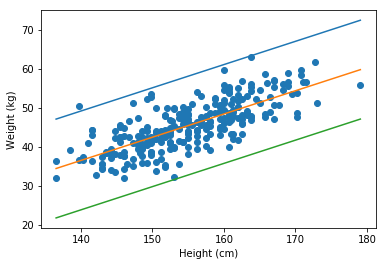

In [21]:
band = 3*rmse

theta0 = reg.intercept_
theta1 = reg.coef_[0]
print(theta0, theta1)
def the_line(h, bias, coef):
    return bias + coef * h

min_height = working_set["height"].min()
min_weight = the_line(min_height, theta0, theta1)
max_height = working_set["height"].max()
max_weight = the_line(max_height, theta0, theta1)
line_x = [min_height, max_height]
line_y = [min_weight, max_weight]
upper_line_y = [min_weight+band, max_weight+band]
lower_line_y = [min_weight-band, max_weight-band]


import matplotlib.pyplot as plt
plt.scatter(working_set["height"], working_set["weight"])
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.plot(line_x, upper_line_y)
plt.plot(line_x, line_y)
plt.plot(line_x, lower_line_y)
plt.show()

## Use the model to make a predictions
predict(X)
X - an array of input instance

In [28]:
some_heights =[[55], [155], [190]]   # This is an array of input vectors
predicted_weights = reg.predict(some_heights)
print(predicted_weights)


[-14.23516511  45.38768158  66.25567791]
[-41.06544612 -35.10316145 -29.14087678]


## We can use predict to plot as well

In [5]:
min_height = working_set["height"].min()
max_height = working_set["height"].max()
line_x = [min_height, max_height]
line_y = reg.predict([[min_height], [max_height]])


import matplotlib.pyplot as plt
plt.scatter(working_set["height"], working_set["weight"])
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.plot(line_x, line_y, color="red")
plt.show()

NameError: name 'reg' is not defined

## Adding Features to the regression.  
Maybe our prediction will be better if we add
more features to the model

### Adding gender into the input

In [63]:
from sklearn.linear_model import LinearRegression
reg_plus_gender = LinearRegression()

X = working_set[["height", "male"]]
Y = working_set["weight"]
reg_plus_gender.fit(X, Y)

print(reg_plus_gender.score(X,Y))

0.5558768412728512


### We did slightly better

### Making the curve fitting a quadratic
We can creat a new feature which is based on old features... In particular, we
add a feature that is the height squared. This allows us to fit a quadratic

0.5579180772423258


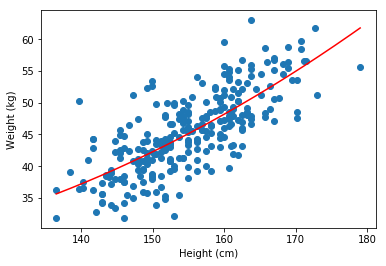

In [64]:
from sklearn.linear_model import LinearRegression
reg_plus_quad = LinearRegression()

X = working_set[["height"]]
Y = working_set["weight"]

from sklearn.preprocessing import PolynomialFeatures
create_quad_terms = PolynomialFeatures(degree=2, include_bias=False)
X_quad_terms = create_quad_terms.fit_transform(X)

                
                
reg_plus_quad.fit(X_quad_terms, Y)

print(reg_plus_quad.score(X_quad_terms,Y))

min_height = working_set["height"].min()
max_height = working_set["height"].max()
points = 1000
delta = (max_height-min_height)/points
quad_x = [min_height + i*delta for i in range(points)]
inputs = [[h, h*h] for h in quad_x]
quad_y = reg_plus_quad.predict(inputs)


import matplotlib.pyplot as plt
plt.scatter(working_set["height"], working_set["weight"])
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.plot(quad_x, quad_y, color="red")
plt.show()

### Creeping upwards!

### Lets try a cubic model

0.5633742912374231


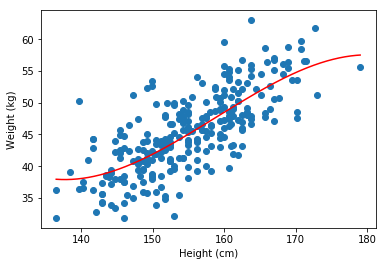

In [65]:
from sklearn.linear_model import LinearRegression
reg_plus_cube = LinearRegression()

X = working_set[["height"]]
Y = working_set["weight"]

from sklearn.preprocessing import PolynomialFeatures
create_cube_terms = PolynomialFeatures(degree=3, include_bias=False)
X_cube_terms = create_cube_terms.fit_transform(X)

                
                
reg_plus_cube.fit(X_cube_terms, Y)

print(reg_plus_cube.score(X_cube_terms,Y))

min_height = working_set["height"].min()
max_height = working_set["height"].max()
points = 1000
delta = (max_height-min_height)/points
cube_x = [min_height + i*delta for i in range(points)]
inputs = [[h, h*h, h**3] for h in cube_x]
cube_y = reg_plus_cube.predict(inputs)

import matplotlib.pyplot as plt
plt.scatter(working_set["height"], working_set["weight"])
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.plot(cube_x, cube_y, color="red")
plt.show()

## Lets evaluate the model on my test set

In [66]:
X = test_set[["height"]]
Y = test_set["weight"]

from sklearn.preprocessing import PolynomialFeatures
create_cube_terms = PolynomialFeatures(degree=3, include_bias=False)
X_cube_terms = create_cube_terms.fit_transform(X)


print(reg_plus_cube.score(X_cube_terms, Y))

0.5851783512790647


## One final thing to try.
Lets use the cubic model and apply it to adults and children

435 109
      height     weight   age  male
55    97.790  12.757275   5.0     0
543  158.750  52.531624  68.0     1
287  167.005  50.603858  49.0     1
166  141.605  44.338618  24.0     0
132  163.195  53.098613  22.0     1
      height     weight   age  male
138  141.605  29.313383  15.0     1
308  157.480  49.214732  18.0     0
440   64.135   6.662132   1.0     0
282  147.320  35.947166  40.0     0
356  152.400  43.544832  63.0     0
0.9327619061923519


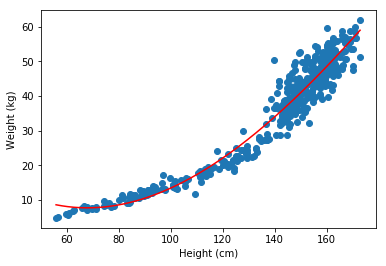

In [67]:
import pandas as pd

data_frame = pd.read_csv("h.csv", sep=";")
#print(data_frame)


from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_frame, test_size=0.2, random_state=123)
print(len(train_set), len(test_set))
print(train_set.head())
print(test_set.head())

# Make a copy of the training set
working_set = train_set.copy()

from sklearn.linear_model import LinearRegression
reg_plus_cube = LinearRegression()

X = working_set[["height"]]
Y = working_set["weight"]

from sklearn.preprocessing import PolynomialFeatures
create_cube_terms = PolynomialFeatures(degree=3, include_bias=False)
X_cube_terms = create_cube_terms.fit_transform(X)
                
                
reg_plus_cube.fit(X_cube_terms, Y)

print(reg_plus_cube.score(X_cube_terms,Y))

min_height = working_set["height"].min()
max_height = working_set["height"].max()
points = 1000
delta = (max_height-min_height)/points
cube_x = [min_height + i*delta for i in range(points)]
inputs = [[h, h*h, h**3] for h in  cube_x]
cube_y = reg_plus_cube.predict(inputs)

import matplotlib.pyplot as plt
plt.scatter(working_set["height"], working_set["weight"])
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.plot(cube_x, cube_y, color="red")
plt.show()

## Lets see how it scores on the age filtered data

In [68]:
X = age_filtered_data[["height"]]
Y = age_filtered_data["weight"]

from sklearn.preprocessing import PolynomialFeatures
create_cube_terms = PolynomialFeatures(degree=3, include_bias=False)
X_cube_terms = create_cube_terms.fit_transform(X)

print(reg_plus_cube.score(X_cube_terms,Y))


0.5368250903340627
